# Layer Normalization - Text Data

## Giới thiệu

Layer Normalization cho dữ liệu text với shape (batch, sequence_length, features).

Layer Normalization sẽ normalize theo:
- Mean và variance được tính trên sequence và feature dimensions
- Normalize cho từng sample độc lập (không phụ thuộc vào batch)

## Công thức

```
mean = mean(x, dim=(1, 2))  # Tính mean theo sequence và feature dims
var = var(x, dim=(1, 2))    # Tính variance theo sequence và feature dims
x_norm = (x - mean) / sqrt(var + eps)
output = gamma * x_norm + beta
```

Trong đó:
- gamma: learnable scale parameter
- beta: learnable shift parameter
- eps: small constant để tránh chia cho 0

Khác với BatchNorm: LayerNorm tính statistics cho từng sample riêng biệt.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

class LayerNorm1D:
    """
    Layer Normalization cho 1D text/sequence data (3D tensor: batch, sequence_length, features)
    """
    def __init__(self, eps=1e-5):
        self.eps = eps
        
        # Learnable parameters (scalar cho toàn bộ features)
        self.gamma = 1.0  # Scale
        self.beta = 0.0   # Shift
        
    def forward(self, x):
        """
        x shape: (batch, sequence_length, features)
        """
        # Tính mean và var theo sequence và feature dimensions
        # Normalize cho từng sample độc lập
        mean = np.mean(x, axis=(1, 2), keepdims=True)
        var = np.var(x, axis=(1, 2), keepdims=True)
        
        # Normalize
        x_norm = (x - mean) / np.sqrt(var + self.eps)
        
        # Scale and shift
        output = self.gamma * x_norm + self.beta
        
        return output

print("LayerNorm1D class đã được định nghĩa!")


LayerNorm1D class đã được định nghĩa!


## Ví dụ 1: 1 Sample, 1 Feature

Shape: (1, 5, 1) - 1 batch, sequence length 5, 1 feature


Input shape: (1, 5, 1)
Input data:
[ 9.96714153  3.61735699 11.47688538 20.23029856  2.65846625]

Input mean: 9.5900, std: 6.3346

Output shape: (1, 5, 1)
Output data:
[ 0.05953185 -0.9428617   0.29786395  1.67970058 -1.09423469]

Output mean: -0.0000, std: 1.0000


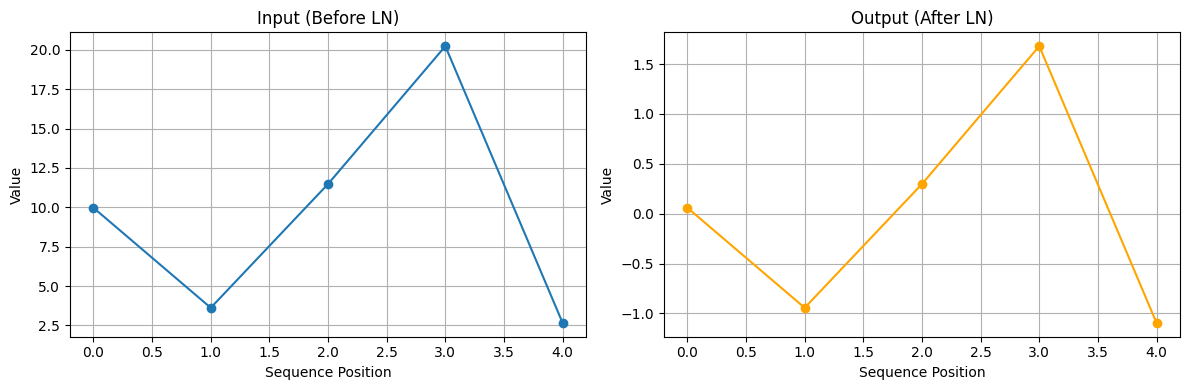

In [2]:
# Ví dụ 1: 1 Sample, 1 Feature
np.random.seed(42)
x1 = np.random.randn(1, 5, 1) * 10 + 5
print(f"Input shape: {x1.shape}")
print(f"Input data:\n{x1[0, :, 0]}")
print(f"\nInput mean: {np.mean(x1):.4f}, std: {np.std(x1):.4f}")

ln1 = LayerNorm1D()
output1 = ln1.forward(x1)
print(f"\nOutput shape: {output1.shape}")
print(f"Output data:\n{output1[0, :, 0]}")
print(f"\nOutput mean: {np.mean(output1):.4f}, std: {np.std(output1):.4f}")

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].plot(x1[0, :, 0], marker='o')
axes[0].set_title('Input (Before LN)')
axes[0].set_xlabel('Sequence Position')
axes[0].set_ylabel('Value')
axes[0].grid(True)

axes[1].plot(output1[0, :, 0], marker='o', color='orange')
axes[1].set_title('Output (After LN)')
axes[1].set_xlabel('Sequence Position')
axes[1].set_ylabel('Value')
axes[1].grid(True)
plt.tight_layout()
plt.show()


## Ví dụ 2: 1 Sample, 2 Features

Shape: (1, 5, 2) - 1 batch, sequence length 5, 2 features


Input shape: (1, 5, 2)
Sample mean: 9.4806, std: 6.8591

Output shape: (1, 5, 2)
Sample output mean: -0.0000, std: 1.0000


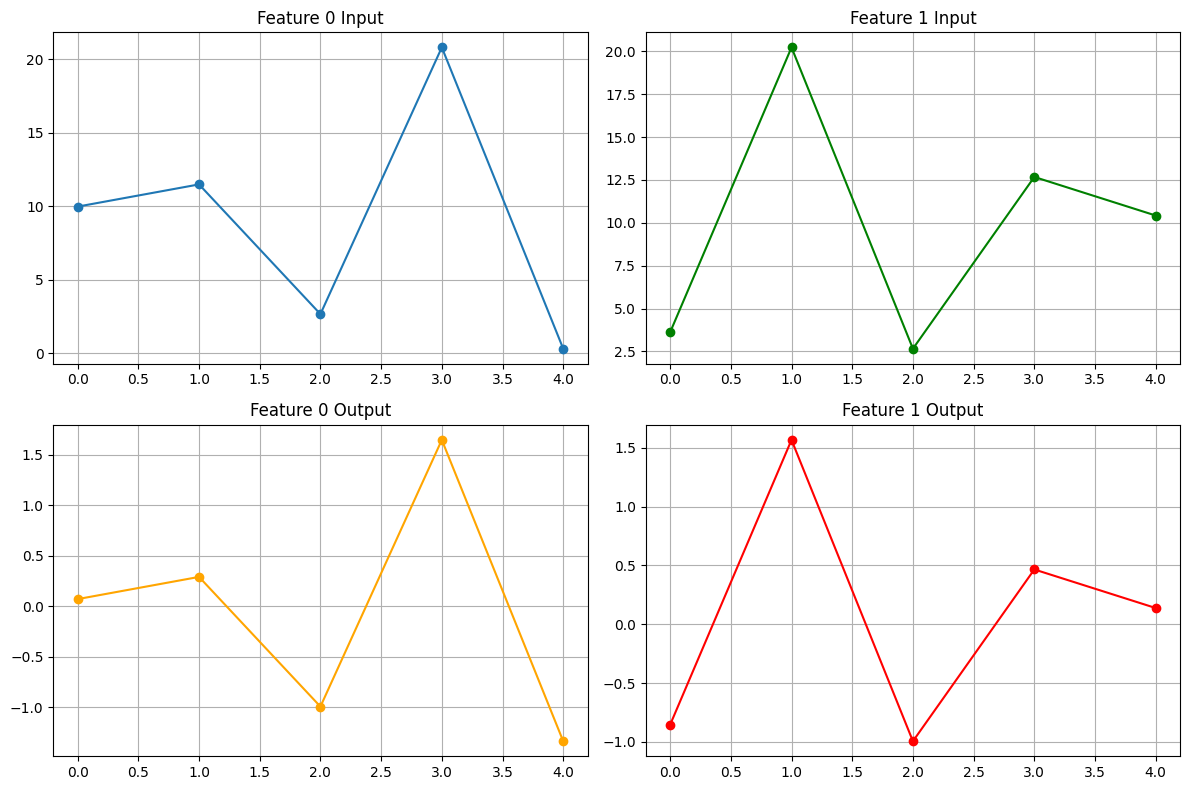

In [3]:
# Ví dụ 2: 1 Sample, 2 Features
np.random.seed(42)
x2 = np.random.randn(1, 5, 2) * 10 + 5
print(f"Input shape: {x2.shape}")
print(f"Sample mean: {np.mean(x2[0]):.4f}, std: {np.std(x2[0]):.4f}")

ln2 = LayerNorm1D()
output2 = ln2.forward(x2)
print(f"\nOutput shape: {output2.shape}")
print(f"Sample output mean: {np.mean(output2[0]):.4f}, std: {np.std(output2[0]):.4f}")

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes[0, 0].plot(x2[0, :, 0], marker='o')
axes[0, 0].set_title('Feature 0 Input')
axes[0, 0].grid(True)
axes[0, 1].plot(x2[0, :, 1], marker='o', color='green')
axes[0, 1].set_title('Feature 1 Input')
axes[0, 1].grid(True)
axes[1, 0].plot(output2[0, :, 0], marker='o', color='orange')
axes[1, 0].set_title('Feature 0 Output')
axes[1, 0].grid(True)
axes[1, 1].plot(output2[0, :, 1], marker='o', color='red')
axes[1, 1].set_title('Feature 1 Output')
axes[1, 1].grid(True)
plt.tight_layout()
plt.show()


## Ví dụ 3: 2 Samples, 1 Feature

Shape: (2, 5, 1) - 2 batches, sequence length 5, 1 feature


Input shape: (2, 5, 1)
Sample 0 mean: 9.5900, std: 6.3346
Sample 1 mean: 9.3712, std: 7.3445

Sample 0 output mean: -0.0000, std: 1.0000
Sample 1 output mean: 0.0000, std: 1.0000


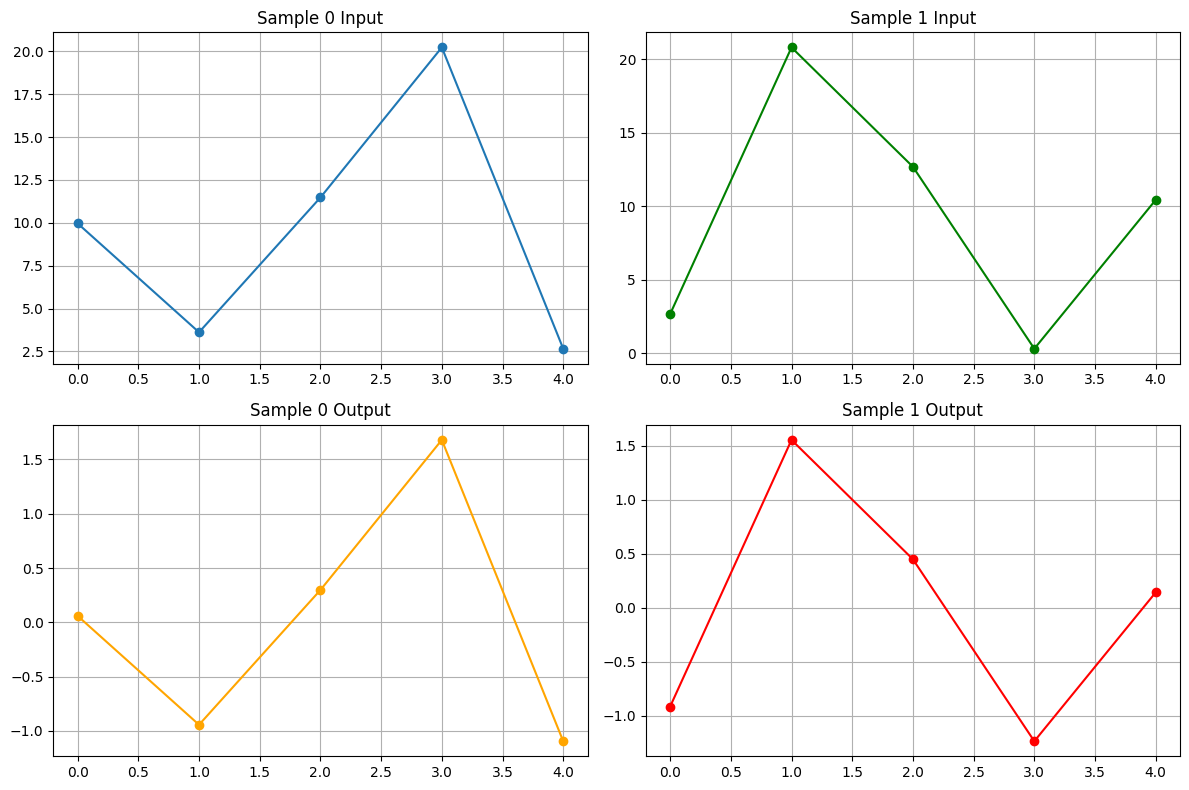

In [4]:
# Ví dụ 3: 2 Samples, 1 Feature
np.random.seed(42)
x3 = np.random.randn(2, 5, 1) * 10 + 5
print(f"Input shape: {x3.shape}")
print(f"Sample 0 mean: {np.mean(x3[0]):.4f}, std: {np.std(x3[0]):.4f}")
print(f"Sample 1 mean: {np.mean(x3[1]):.4f}, std: {np.std(x3[1]):.4f}")

ln3 = LayerNorm1D()
output3 = ln3.forward(x3)
print(f"\nSample 0 output mean: {np.mean(output3[0]):.4f}, std: {np.std(output3[0]):.4f}")
print(f"Sample 1 output mean: {np.mean(output3[1]):.4f}, std: {np.std(output3[1]):.4f}")

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes[0, 0].plot(x3[0, :, 0], marker='o')
axes[0, 0].set_title('Sample 0 Input')
axes[0, 0].grid(True)
axes[0, 1].plot(x3[1, :, 0], marker='o', color='green')
axes[0, 1].set_title('Sample 1 Input')
axes[0, 1].grid(True)
axes[1, 0].plot(output3[0, :, 0], marker='o', color='orange')
axes[1, 0].set_title('Sample 0 Output')
axes[1, 0].grid(True)
axes[1, 1].plot(output3[1, :, 0], marker='o', color='red')
axes[1, 1].set_title('Sample 1 Output')
axes[1, 1].grid(True)
plt.tight_layout()
plt.show()


## Ví dụ 4: 2 Samples, 2 Features

Shape: (2, 5, 2) - 2 batches, sequence length 5, 2 features


Input shape: (2, 5, 2)
Sample 0 - Input mean: 9.4806, std: 6.8591
Sample 0 - Output mean: -0.0000, std: 1.0000
Sample 1 - Input mean: -2.9066, std: 7.1656
Sample 1 - Output mean: -0.0000, std: 1.0000


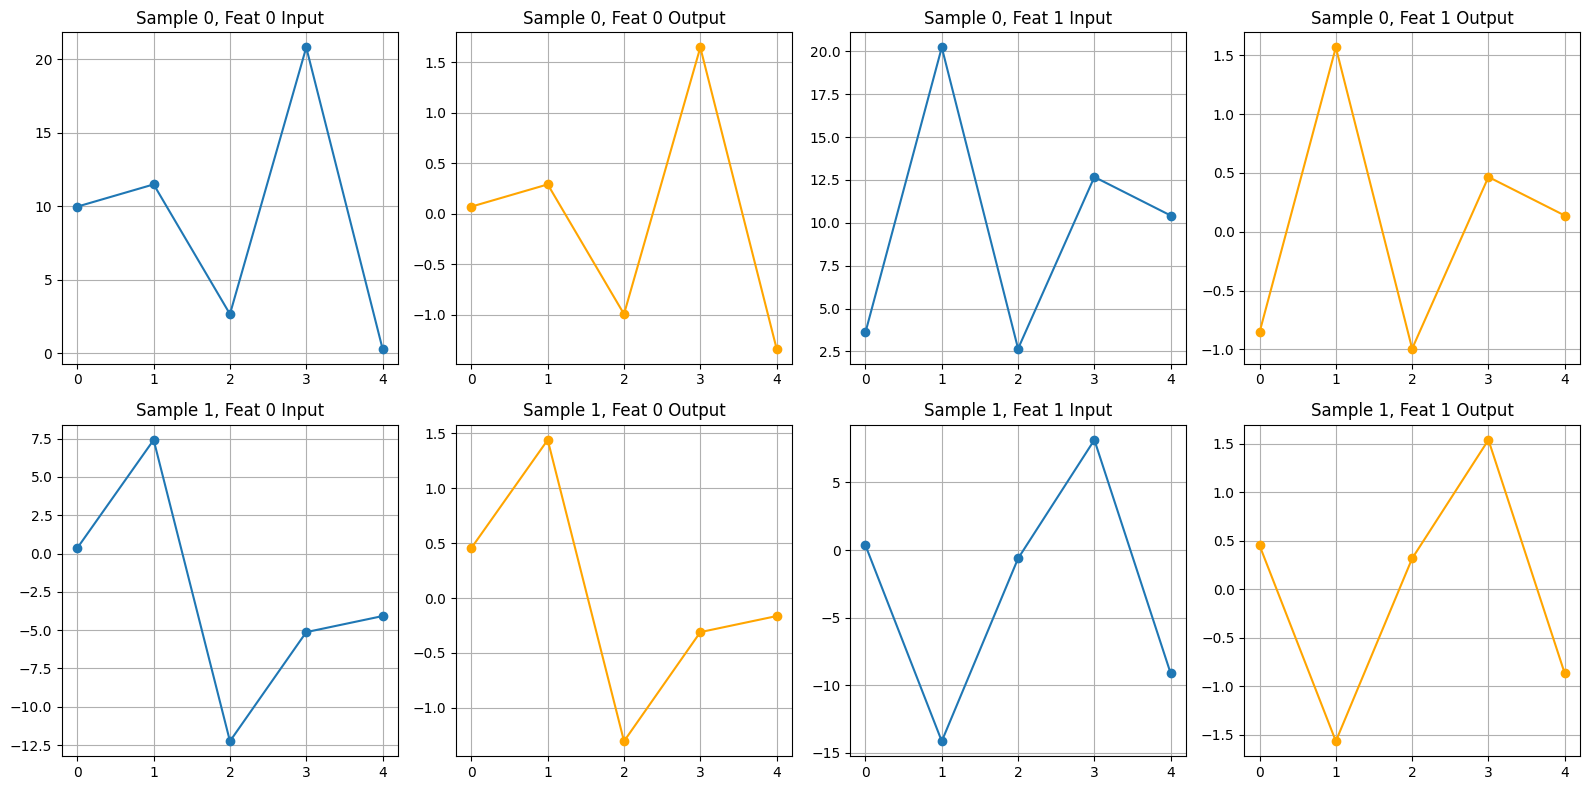

In [5]:
# Ví dụ 4: 2 Samples, 2 Features
np.random.seed(42)
x4 = np.random.randn(2, 5, 2) * 10 + 5
print(f"Input shape: {x4.shape}")

ln4 = LayerNorm1D()
output4 = ln4.forward(x4)

for b in range(2):
    print(f"Sample {b} - Input mean: {np.mean(x4[b]):.4f}, std: {np.std(x4[b]):.4f}")
    print(f"Sample {b} - Output mean: {np.mean(output4[b]):.4f}, std: {np.std(output4[b]):.4f}")

fig, axes = plt.subplots(2, 4, figsize=(16, 8))
for b in range(2):
    for f in range(2):
        axes[b, f*2].plot(x4[b, :, f], marker='o')
        axes[b, f*2].set_title(f'Sample {b}, Feat {f} Input')
        axes[b, f*2].grid(True)
        axes[b, f*2+1].plot(output4[b, :, f], marker='o', color='orange')
        axes[b, f*2+1].set_title(f'Sample {b}, Feat {f} Output')
        axes[b, f*2+1].grid(True)
plt.tight_layout()
plt.show()
